<a href="https://colab.research.google.com/github/JoseOrtega51/ValuationLibrary/blob/main/examples/butterfly_spread_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/JoseOrtega51/ValuationLibrary.git

Cloning into 'ValuationLibrary'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (63/63), done.
Receiving objects: 100% (103/103), 41.53 KiB | 3.46 MiB/s, done.
remote: Total 103 (delta 51), reused 87 (delta 38), pack-reused 0 (from 0)
Resolving deltas: 100% (51/51), done.


In [7]:
!!cd ValuationLibrary/ && git pull

['remote: Enumerating objects: 7, done.\x1b[K',
 'remote: Counting objects:  14% (1/7)\x1b[K',
 'remote: Counting objects:  28% (2/7)\x1b[K',
 'remote: Counting objects:  42% (3/7)\x1b[K',
 'remote: Counting objects:  57% (4/7)\x1b[K',
 'remote: Counting objects:  71% (5/7)\x1b[K',
 'remote: Counting objects:  85% (6/7)\x1b[K',
 'remote: Counting objects: 100% (7/7)\x1b[K',
 'remote: Counting objects: 100% (7/7), done.\x1b[K',
 'remote: Compressing objects:  50% (1/2)\x1b[K',
 'remote: Compressing objects: 100% (2/2)\x1b[K',
 'remote: Compressing objects: 100% (2/2), done.\x1b[K',
 'remote: Total 4 (delta 2), reused 4 (delta 2), pack-reused 0 (from 0)\x1b[K',
 'Unpacking objects:  25% (1/4)',
 'Unpacking objects:  50% (2/4)',
 'Unpacking objects:  75% (3/4)',
 'Unpacking objects: 100% (4/4)',
 'Unpacking objects: 100% (4/4), 505 bytes | 505.00 KiB/s, done.',
 'From https://github.com/JoseOrtega51/ValuationLibrary',
 '   17ced4b..e3e717f  FixingColab -> origin/FixingColab',
 'Updating 1

In [3]:
!apt-get update
!apt-get install -y build-essential
!pip install pybind11 setuptools

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,452 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,224 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Pac

In [8]:
!cd ValuationLibrary/ && pip install .

Processing /content/ValuationLibrary
  Preparing metadata (setup.py) ... done
  Created wheel for ValuationLibrary: filename=ValuationLibrary-0.1-cp310-cp310-linux_x86_64.whl size=3762432 sha256=a1fe24c4256bbb907e60fee8d7d648cca343761031902ef2aa6c7f4395223ff8
  Stored in directory: /tmp/pip-ephem-wheel-cache-y_w353j2/wheels/3c/94/ca/fa817abf972cbdca2a52ca1f571e25f8a2a9f9df7dc9092437
Successfully built ValuationLibrary
  Attempting uninstall: ValuationLibrary
    Found existing installation: ValuationLibrary 0.1
    Uninstalling ValuationLibrary-0.1:
      Successfully uninstalled ValuationLibrary-0.1


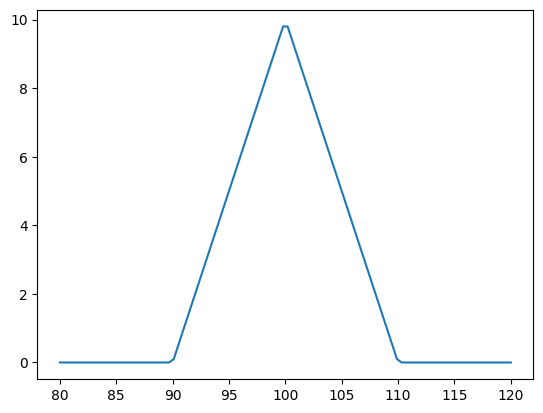

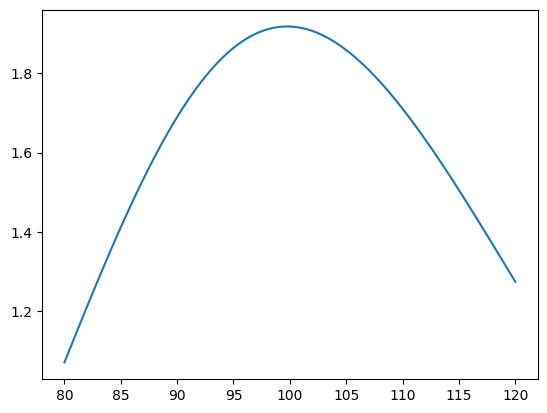

d2C/dK2 =(aprox)= 0.01918299415796433


In [12]:
import ValuationLibrary as ValLry
import numpy as np
import matplotlib.pyplot as plt

#BSM parameters
vol = 0.2
r = 0.02

#Define a strategy portfolio
BFS = ValLry.portfolio()

################## CREATE BUTTERFLY SPREAD ####################################
dK = 10.
K0 = 100.

strikes = [K0 - dK, K0, K0, K0 + dK]
positions = ['L', 'S', 'S', 'L']

i = 0
for K in strikes:

    #Define a European Option
    OpcionCall = ValLry.EuropeanOption(ValLry.OptionType.CALL,K, 1.)

    #set the default model
    OpcionCall.BSM.setup(vol, r)
    OpcionCall.setPricingModel(ValLry.PricingModel.BLACK_SCHOLES)

    #Add option to portfolio
    if(positions[i] == 'L'):
        BFS.longInstrument("Option_{}".format(i), OpcionCall)
    else:
        BFS.shortInstrument("Option_{}".format(i), OpcionCall)

    i += 1

#####################################################################

# Payoff butterfly spread
S = np.linspace(K0 - 2 * dK, K0 + 2 * dK, 100)
Value_straddle = BFS.price(1.,S)
plt.plot(S,Value_straddle)
plt.show()

# Price butterfly spread
Value_straddle = BFS.price(0.,S)
plt.plot(S,Value_straddle)
plt.show()

print("d2C/dK2 =(aprox)= {}".format(BFS.price(0.,K0)/(dK)**2))